# Analysis of sample and mean flux computation

In [1]:
%pylab inline
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp
from astropy.io import fits
from astropy.table import Table, join

Populating the interactive namespace from numpy and matplotlib


## Loading spectra

We have a set of 6 samples: these have different CIV absorption: 0x, 1x, 10x, 20x, 100x.

In [2]:
#hdu_spectra_0=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.0/spectra-0.fits')
hdu_truth_0=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.0/truth-16-0.fits')
hdu_zbest_0=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.0/zbest-16-0.fits')

#hdu_spectra_1=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.1/spectra-0.fits')
hdu_truth_1=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.1/truth-16-0.fits')
hdu_zbest_1=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.1/zbest-16-0.fits')

#hdu_spectra_10=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.2/spectra-0.fits')
hdu_truth_10=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.2/truth-16-0.fits')
hdu_zbest_10=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.2/zbest-16-0.fits')

#hdu_spectra_20=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.3/spectra-0.fits')
hdu_truth_20=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.3/truth-16-0.fits')
hdu_zbest_20=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.3/zbest-16-0.fits')

#hdu_spectra_100=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.4/spectra-0.fits')
hdu_truth_100=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.4/truth-16-0.fits')
hdu_zbest_100=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.4/zbest-16-0.fits')

In [3]:
z=hdu_zbest_0[1].data['Z']

In [4]:
wave_min = 3500
wave_max = 10000
wavelength = np.arange(wave_min,wave_max,0.19999384634318945)

In [5]:
"""
plt.figure(figsize=(20,10))
plt.plot(hdu_spectra_0[2].data, hdu_spectra_0[3].data[1], color="limegreen", alpha=0.7)
plt.plot(hdu_spectra_0[7].data, hdu_spectra_0[8].data[1], color="lightcoral", alpha=0.7)
plt.plot(hdu_spectra_0[12].data, hdu_spectra_0[13].data[1], color="silver", alpha=0.7)
plt.plot(wavelength,hdu_truth_0[3].data['TRUE_CONT'][1], color="black", linewidth=1, alpha=0.6)
plt.ylim(-6,8)
plt.show()
"""

'\nplt.figure(figsize=(20,10))\nplt.plot(hdu_spectra_0[2].data, hdu_spectra_0[3].data[1], color="limegreen", alpha=0.7)\nplt.plot(hdu_spectra_0[7].data, hdu_spectra_0[8].data[1], color="lightcoral", alpha=0.7)\nplt.plot(hdu_spectra_0[12].data, hdu_spectra_0[13].data[1], color="silver", alpha=0.7)\nplt.plot(wavelength,hdu_truth_0[3].data[\'TRUE_CONT\'][1], color="black", linewidth=1, alpha=0.6)\nplt.ylim(-6,8)\nplt.show()\n'

In [6]:
"""
plt.figure(figsize=(20,10))
plt.plot(hdu_spectra_20[2].data, hdu_spectra_20[3].data[1], color="limegreen", alpha=0.7)
plt.plot(hdu_spectra_20[7].data, hdu_spectra_20[8].data[1], color="lightcoral", alpha=0.7)
plt.plot(hdu_spectra_20[12].data, hdu_spectra_20[13].data[1], color="silver", alpha=0.7)
plt.plot(wavelength,hdu_truth_20[3].data['TRUE_CONT'][1], color="black", linewidth=1, alpha=0.6)
plt.ylim(-6,8)
plt.show()
"""

'\nplt.figure(figsize=(20,10))\nplt.plot(hdu_spectra_20[2].data, hdu_spectra_20[3].data[1], color="limegreen", alpha=0.7)\nplt.plot(hdu_spectra_20[7].data, hdu_spectra_20[8].data[1], color="lightcoral", alpha=0.7)\nplt.plot(hdu_spectra_20[12].data, hdu_spectra_20[13].data[1], color="silver", alpha=0.7)\nplt.plot(wavelength,hdu_truth_20[3].data[\'TRUE_CONT\'][1], color="black", linewidth=1, alpha=0.6)\nplt.ylim(-6,8)\nplt.show()\n'

### Lya and CIV forests

The next plots show a spectrum with CIV absorption with different absorption values (x1, x10, x20, x100), the first one is the whole spectrum, the second one zooms the CIV region.

In [7]:
"""
plt.figure(figsize=(20,10))
plt.plot(hdu_spectra_100[2].data, hdu_spectra_100[3].data[1], linewidth=1, color="lime", alpha=0.6, label="CIVx100")
plt.plot(hdu_spectra_100[7].data, hdu_spectra_100[8].data[1], linewidth=1, color="lime", alpha=0.6)
plt.plot(hdu_spectra_100[12].data, hdu_spectra_100[13].data[1], linewidth=1, color="lime", alpha=0.6)
plt.plot(hdu_spectra_10[2].data, hdu_spectra_20[3].data[1], linewidth=1, color="deeppink", alpha=0.6, label="CIVx20")
plt.plot(hdu_spectra_10[7].data, hdu_spectra_20[8].data[1], linewidth=1,color="deeppink", alpha=0.6)
plt.plot(hdu_spectra_10[12].data, hdu_spectra_20[13].data[1], linewidth=1,color="deeppink", alpha=0.6)
plt.plot(hdu_spectra_10[2].data, hdu_spectra_10[3].data[1], linewidth=1,color="blueviolet", alpha=0.6, label="CIVx10")
plt.plot(hdu_spectra_10[7].data, hdu_spectra_10[8].data[1], linewidth=1,color="blueviolet", alpha=0.6)
plt.plot(hdu_spectra_10[12].data, hdu_spectra_10[13].data[1], linewidth=1,color="blueviolet", alpha=0.6)
plt.plot(hdu_spectra_1[2].data, hdu_spectra_1[3].data[1], linewidth=1,color="aqua", alpha=0.6, label="CIVx1")
plt.plot(hdu_spectra_1[7].data, hdu_spectra_1[8].data[1], linewidth=1,color="aqua", alpha=0.6)
plt.plot(hdu_spectra_1[12].data, hdu_spectra_1[13].data[1], linewidth=1,color="aqua", alpha=0.6)
plt.plot(wavelength,hdu_truth_0[3].data['TRUE_CONT'][1], linewidth=1, color="black", alpha=0.7)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(hdu_spectra_100[2].data, hdu_spectra_100[3].data[1], color="lime", alpha=0.6, label="CIVx100")
plt.plot(hdu_spectra_100[7].data, hdu_spectra_100[8].data[1], color="lime", alpha=0.6)
plt.plot(hdu_spectra_100[12].data, hdu_spectra_100[13].data[1], color="lime", alpha=0.6)
plt.plot(hdu_spectra_10[2].data, hdu_spectra_20[3].data[1], color="deeppink", alpha=0.6, label="CIVx20")
plt.plot(hdu_spectra_10[7].data, hdu_spectra_20[8].data[1], color="deeppink", alpha=0.6)
plt.plot(hdu_spectra_10[12].data, hdu_spectra_20[13].data[1], color="deeppink", alpha=0.6)
plt.plot(hdu_spectra_10[2].data, hdu_spectra_10[3].data[1], color="blueviolet", alpha=0.6, label="CIVx10")
plt.plot(hdu_spectra_10[7].data, hdu_spectra_10[8].data[1], color="blueviolet", alpha=0.6)
plt.plot(hdu_spectra_10[12].data, hdu_spectra_10[13].data[1], color="blueviolet", alpha=0.6)
plt.plot(hdu_spectra_1[2].data, hdu_spectra_1[3].data[1], color="aqua", alpha=0.6, label="CIVx1")
plt.plot(hdu_spectra_1[7].data, hdu_spectra_1[8].data[1], color="aqua", alpha=0.6)
plt.plot(hdu_spectra_1[12].data, hdu_spectra_1[13].data[1], color="aqua", alpha=0.6)
plt.plot(wavelength,hdu_truth_0[3].data['TRUE_CONT'][1], color="black", alpha=0.7)
plt.legend()
plt.xlim(4350,6000)
#plt.ylim(0,4.0)
plt.show()
"""

'\nplt.figure(figsize=(20,10))\nplt.plot(hdu_spectra_100[2].data, hdu_spectra_100[3].data[1], linewidth=1, color="lime", alpha=0.6, label="CIVx100")\nplt.plot(hdu_spectra_100[7].data, hdu_spectra_100[8].data[1], linewidth=1, color="lime", alpha=0.6)\nplt.plot(hdu_spectra_100[12].data, hdu_spectra_100[13].data[1], linewidth=1, color="lime", alpha=0.6)\nplt.plot(hdu_spectra_10[2].data, hdu_spectra_20[3].data[1], linewidth=1, color="deeppink", alpha=0.6, label="CIVx20")\nplt.plot(hdu_spectra_10[7].data, hdu_spectra_20[8].data[1], linewidth=1,color="deeppink", alpha=0.6)\nplt.plot(hdu_spectra_10[12].data, hdu_spectra_20[13].data[1], linewidth=1,color="deeppink", alpha=0.6)\nplt.plot(hdu_spectra_10[2].data, hdu_spectra_10[3].data[1], linewidth=1,color="blueviolet", alpha=0.6, label="CIVx10")\nplt.plot(hdu_spectra_10[7].data, hdu_spectra_10[8].data[1], linewidth=1,color="blueviolet", alpha=0.6)\nplt.plot(hdu_spectra_10[12].data, hdu_spectra_10[13].data[1], linewidth=1,color="blueviolet", alp

# Coadd

The next cells plot the coadded spectra with the different CIV absorptions.

In [8]:
import desispec.io
from desispec.coaddition import coadd_cameras,resample_spectra_lin_or_log

In [9]:
print('desispec  ', desispec.__version__)

desispec   0.44.2.dev5508


In [10]:
specobj_100 = desispec.io.read_spectra('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.4/spectra-0.fits')
specobj_100 = resample_spectra_lin_or_log(specobj_100,linear_step=0.8, wave_min =wave_min+1, wave_max =wave_max-1, fast = True)
specobj_100 = coadd_cameras(specobj_100, cosmics_nsig=None)

specobj_20 = desispec.io.read_spectra('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.3/spectra-0.fits')
specobj_20 = resample_spectra_lin_or_log(specobj_20,linear_step=0.8, wave_min =wave_min+1, wave_max =wave_max-1, fast = True)
specobj_20 = coadd_cameras(specobj_20, cosmics_nsig=None)

specobj_10 = desispec.io.read_spectra('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.2/spectra-0.fits')
specobj_10 = resample_spectra_lin_or_log(specobj_10,linear_step=0.8, wave_min =wave_min+1, wave_max =wave_max-1, fast = True)
specobj_10 = coadd_cameras(specobj_10, cosmics_nsig=None)

specobj_1 = desispec.io.read_spectra('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.1/spectra-0.fits')
specobj_1 = resample_spectra_lin_or_log(specobj_1,linear_step=0.8, wave_min =wave_min+1, wave_max =wave_max-1, fast = True)
specobj_1 = coadd_cameras(specobj_1, cosmics_nsig=None)

INFO:spectra.py:261:read_spectra: iotime 130.522 sec to read spectra-0.fits at 2021-07-08T18:47:45.928467
INFO:spectra.py:261:read_spectra: iotime 1.768 sec to read spectra-0.fits at 2021-07-08T18:51:23.466951
INFO:spectra.py:261:read_spectra: iotime 1.595 sec to read spectra-0.fits at 2021-07-08T18:53:02.502047
INFO:spectra.py:261:read_spectra: iotime 1.446 sec to read spectra-0.fits at 2021-07-08T18:53:23.663730


In [11]:
flux_coadd_100=specobj_100.flux.values()
flux_coadd_20=specobj_20.flux.values()
flux_coadd_10=specobj_10.flux.values()
flux_coadd_1=specobj_1.flux.values()

Next plot shows a coadded spectrum with the four different values of CIV absorption: x1, x10, x20, x100

In [12]:
"""
plt.figure(figsize=(20,10))
plt.plot(specobj_20.wave["brz"],specobj_100.flux['brz'][1], linewidth=1, color="lightskyblue", alpha=0.7, label="x100")
plt.plot(specobj_20.wave["brz"],specobj_20.flux['brz'][1], linewidth=1, color="cornflowerblue", alpha=0.7, label="x20")
plt.plot(specobj_20.wave["brz"],specobj_10.flux['brz'][1], linewidth=1, color="royalblue", alpha=0.7, label="x10")
plt.plot(specobj_20.wave["brz"],specobj_1.flux['brz'][1], linewidth=1, color="navy", alpha=0.7, label="x1")
plt.legend()
"""

'\nplt.figure(figsize=(20,10))\nplt.plot(specobj_20.wave["brz"],specobj_100.flux[\'brz\'][1], linewidth=1, color="lightskyblue", alpha=0.7, label="x100")\nplt.plot(specobj_20.wave["brz"],specobj_20.flux[\'brz\'][1], linewidth=1, color="cornflowerblue", alpha=0.7, label="x20")\nplt.plot(specobj_20.wave["brz"],specobj_10.flux[\'brz\'][1], linewidth=1, color="royalblue", alpha=0.7, label="x10")\nplt.plot(specobj_20.wave["brz"],specobj_1.flux[\'brz\'][1], linewidth=1, color="navy", alpha=0.7, label="x1")\nplt.legend()\n'

In [13]:
"""
z
"""

'\nz\n'

Next plot shows five coadded spectra with the four different values of CIV absorption: x1, x10, x20, x100.
After that, a zoom into the CIV region of one of them.

In [14]:
"""
x = specobj_20.wave["brz"]

y_a_100 = specobj_100.flux['brz'][1]
y_a_20 = specobj_20.flux['brz'][1]
y_a_10 = specobj_10.flux['brz'][1]
y_a_1 = specobj_1.flux['brz'][1]

y_b_100 = specobj_100.flux['brz'][2]
y_b_20 = specobj_20.flux['brz'][2]
y_b_10 = specobj_10.flux['brz'][2]
y_b_1 = specobj_1.flux['brz'][2]

y_c_100 = specobj_100.flux['brz'][3]
y_c_20 = specobj_20.flux['brz'][3]
y_c_10 = specobj_10.flux['brz'][3]
y_c_1 = specobj_1.flux['brz'][3]

y_d_100 = specobj_100.flux['brz'][4]
y_d_20 = specobj_20.flux['brz'][4]
y_d_10 = specobj_10.flux['brz'][4]
y_d_1 = specobj_1.flux['brz'][4]

y_e_100 = specobj_100.flux['brz'][5]
y_e_20 = specobj_20.flux['brz'][5]
y_e_10 = specobj_10.flux['brz'][5]
y_e_1 = specobj_1.flux['brz'][5]


plt.figure(figsize=(15,10))
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True, figsize=(20,15))

ax1.plot(x, y_a_100, linewidth=1, color="lightskyblue", alpha=0.7)
ax1.plot(x, y_a_20, linewidth=1, color="cornflowerblue", alpha=0.7)
ax1.plot(x, y_a_10, linewidth=1, color="royalblue", alpha=0.7)
ax1.plot(x, y_a_1, linewidth=1, color="navy", alpha=0.7)
ax1.text(9000, 10, f'z={z[10]:.3g}')
ax1.set_ylabel("Flux")

ax2.plot(x, y_b_100, linewidth=1, color="lightskyblue", alpha=0.7)
ax2.plot(x, y_b_20, linewidth=1, color="cornflowerblue", alpha=0.7)
ax2.plot(x, y_b_10, linewidth=1, color="royalblue", alpha=0.7)
ax2.plot(x, y_b_1, linewidth=1, color="navy", alpha=0.7)
ax2.text(9000, 2, f'z={z[20]:.3g}')
ax2.set_ylabel("Flux")

ax3.plot(x, y_c_100, linewidth=1, color="lightskyblue", alpha=0.7)
ax3.plot(x, y_c_20, linewidth=1, color="cornflowerblue", alpha=0.7)
ax3.plot(x, y_c_10, linewidth=1, color="royalblue", alpha=0.7)
ax3.plot(x, y_c_1, linewidth=1, color="navy", alpha=0.7)
ax3.text(9000, 3, f'z={z[1]:.3g}')
ax3.set_ylabel("Flux")

ax4.plot(x, y_d_100, linewidth=1, color="lightskyblue", alpha=0.7)
ax4.plot(x, y_d_20, linewidth=1, color="cornflowerblue", alpha=0.7)
ax4.plot(x, y_d_10, linewidth=1, color="royalblue", alpha=0.7)
ax4.plot(x, y_d_1, linewidth=1, color="navy", alpha=0.7)
ax4.text(9000, 1, f'z={z[12]:.3g}')
ax4.set_ylabel("Flux")

ax5.plot(x, y_e_100, linewidth=1, color="lightskyblue", alpha=0.7)
ax5.plot(x, y_e_20, linewidth=1, color="cornflowerblue", alpha=0.7)
ax5.plot(x, y_e_10, linewidth=1, color="royalblue", alpha=0.7)
ax5.plot(x, y_e_1, linewidth=1, color="navy", alpha=0.7)
ax5.text(9000, 75, f'z={z[24]:.3g}')
ax5.set_ylabel("Flux")

# Fine-tune figure; make subplots close to each other 
fig.subplots_adjust(hspace=0)
plt.xlabel("Wavelength [$\AA$]")
plt.savefig("spectra_5.png")
"""

'\nx = specobj_20.wave["brz"]\n\ny_a_100 = specobj_100.flux[\'brz\'][1]\ny_a_20 = specobj_20.flux[\'brz\'][1]\ny_a_10 = specobj_10.flux[\'brz\'][1]\ny_a_1 = specobj_1.flux[\'brz\'][1]\n\ny_b_100 = specobj_100.flux[\'brz\'][2]\ny_b_20 = specobj_20.flux[\'brz\'][2]\ny_b_10 = specobj_10.flux[\'brz\'][2]\ny_b_1 = specobj_1.flux[\'brz\'][2]\n\ny_c_100 = specobj_100.flux[\'brz\'][3]\ny_c_20 = specobj_20.flux[\'brz\'][3]\ny_c_10 = specobj_10.flux[\'brz\'][3]\ny_c_1 = specobj_1.flux[\'brz\'][3]\n\ny_d_100 = specobj_100.flux[\'brz\'][4]\ny_d_20 = specobj_20.flux[\'brz\'][4]\ny_d_10 = specobj_10.flux[\'brz\'][4]\ny_d_1 = specobj_1.flux[\'brz\'][4]\n\ny_e_100 = specobj_100.flux[\'brz\'][5]\ny_e_20 = specobj_20.flux[\'brz\'][5]\ny_e_10 = specobj_10.flux[\'brz\'][5]\ny_e_1 = specobj_1.flux[\'brz\'][5]\n\n\nplt.figure(figsize=(15,10))\nfig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True, figsize=(20,15))\n\nax1.plot(x, y_a_100, linewidth=1, color="lightskyblue", alpha=0.7)\nax1.plot(x, y_a_

In [15]:
"""
plt.figure(figsize=(20,10))
plt.plot(specobj_20.wave["brz"],specobj_100.flux['brz'][1], linewidth=1, color="lightskyblue", alpha=0.5, label="x100")
plt.plot(specobj_20.wave["brz"],specobj_20.flux['brz'][1], linewidth=1, color="cornflowerblue", alpha=0.5, label="x20")
plt.plot(specobj_20.wave["brz"],specobj_10.flux['brz'][1], linewidth=1, color="royalblue", alpha=0.5, label="x10")
plt.plot(specobj_20.wave["brz"],specobj_1.flux['brz'][1], linewidth=1, color="navy", alpha=0.5, label="x1")
plt.legend()
plt.xlim(4400,5800)
plt.ylim(0.1,2)
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Flux")
plt.savefig("CIV_zoom.png")
"""

'\nplt.figure(figsize=(20,10))\nplt.plot(specobj_20.wave["brz"],specobj_100.flux[\'brz\'][1], linewidth=1, color="lightskyblue", alpha=0.5, label="x100")\nplt.plot(specobj_20.wave["brz"],specobj_20.flux[\'brz\'][1], linewidth=1, color="cornflowerblue", alpha=0.5, label="x20")\nplt.plot(specobj_20.wave["brz"],specobj_10.flux[\'brz\'][1], linewidth=1, color="royalblue", alpha=0.5, label="x10")\nplt.plot(specobj_20.wave["brz"],specobj_1.flux[\'brz\'][1], linewidth=1, color="navy", alpha=0.5, label="x1")\nplt.legend()\nplt.xlim(4400,5800)\nplt.ylim(0.1,2)\nplt.xlabel("Wavelength [$\\AA$]")\nplt.ylabel("Flux")\nplt.savefig("CIV_zoom.png")\n'

# Mean Flux and transmission

In [16]:
cont_interp = sp.interpolate.interp1d(wavelength,hdu_truth_0[3].data['TRUE_CONT'])

In [17]:
continuum_100 = cont_interp(specobj_100.wave['brz'])
continuum_20 = cont_interp(specobj_20.wave['brz'])
continuum_10 = cont_interp(specobj_10.wave['brz'])
continuum_1 = cont_interp(specobj_1.wave['brz'])

The next plot is the transmission of a spectrum. The different shades of blue are the different values of CIV absorption (x1, x10, x20, x100).
The transmisison is computed dividing the flux/continuum (after having interpolated the continuum to be able to make this operation)

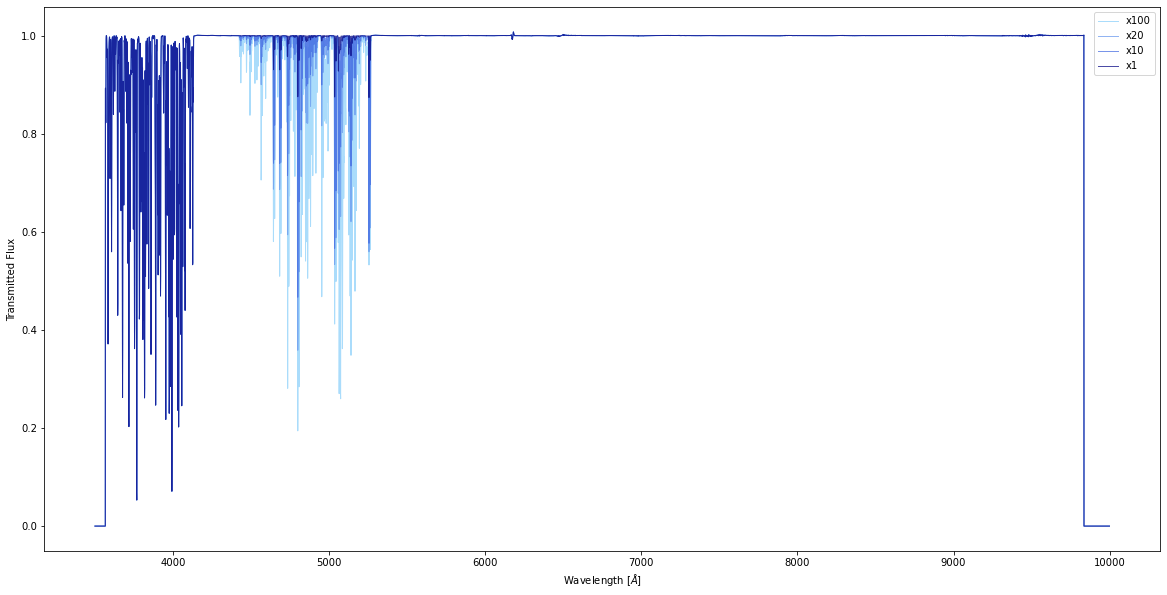

In [18]:
plt.figure(figsize=(20,10))
plt.plot(specobj_20.wave["brz"],specobj_100.flux['brz'][2]/continuum_100[2], linewidth=1, color="lightskyblue", alpha=0.7, label="x100")
plt.plot(specobj_20.wave["brz"],specobj_20.flux['brz'][2]/continuum_20[2], linewidth=1, color="cornflowerblue", alpha=0.7, label="x20")
plt.plot(specobj_20.wave["brz"],specobj_10.flux['brz'][2]/continuum_10[2], linewidth=1, color="royalblue", alpha=0.7, label="x10")
plt.plot(specobj_20.wave["brz"],specobj_1.flux['brz'][2]/continuum_1[2], linewidth=1, color="navy", alpha=0.7, label="x1")
plt.legend()
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Transmitted Flux")
plt.savefig("CIV_transmission.png")

(0.99, 1.01)

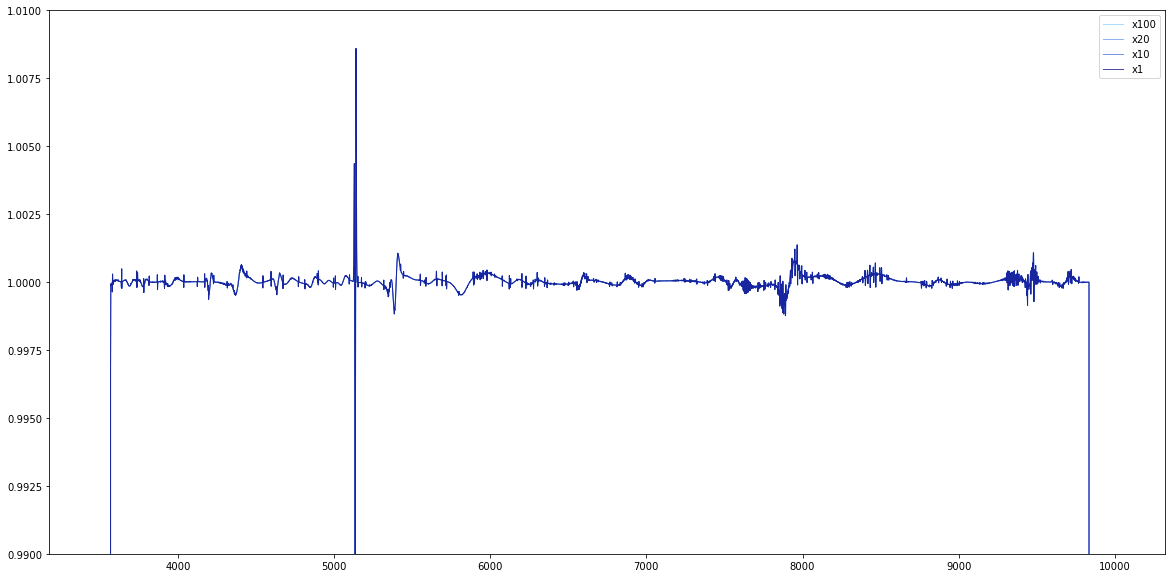

In [19]:
plt.figure(figsize=(20,10))
plt.plot(specobj_20.wave["brz"],specobj_100.flux['brz'][10]/continuum_100[10], linewidth=1, color="lightskyblue", alpha=0.7, label="x100")
plt.plot(specobj_20.wave["brz"],specobj_20.flux['brz'][10]/continuum_20[10], linewidth=1, color="cornflowerblue", alpha=0.7, label="x20")
plt.plot(specobj_20.wave["brz"],specobj_10.flux['brz'][10]/continuum_10[10], linewidth=1, color="royalblue", alpha=0.7, label="x10")
plt.plot(specobj_20.wave["brz"],specobj_1.flux['brz'][10]/continuum_1[10], linewidth=1, color="navy", alpha=0.7, label="x1")
plt.legend()
#plt.xlim(1000,2500)
plt.ylim(0.99,1.01)

In [20]:
z

array([3.13013077, 2.72160411, 2.39979792, ..., 2.39235711, 2.55678177,
       3.04733872])

In [21]:
z_min=np.min(z)
z_max=np.max(z)
print("z_min = ", z_min)
print("z_max = ", z_max)
zbins = 100
sum_flux = np.zeros(zbins)

z_min =  1.8029756546020508
z_max =  3.607822895050049


In [22]:
#CIV forest:
lambda_min = 1420.0
lambda_max = 1520.0
lambda_min_obs = lambda_min*(1.0 + z)
lambda_max_obs = lambda_max*(1.0 + z)
print("lambda min obs")
print(lambda_min_obs)
print("lambda max obs")
print(lambda_max_obs)

lambda min obs
[5864.78569031 5284.67783451 4827.71304131 ... 4817.14709759 5050.63011169
 5747.22098827]
lambda max obs
[6277.79876709 5656.83824539 5167.69283295 ... 5156.38280869 5406.30828857
 6151.95486069]


In [23]:
wavelength_CIV_rf = [np.arange(lambda_min,lambda_max,1)]
#np.shape(forests)
print(wavelength_CIV_rf)
#print(wavelength_CIV)

[array([1420., 1421., 1422., 1423., 1424., 1425., 1426., 1427., 1428.,
       1429., 1430., 1431., 1432., 1433., 1434., 1435., 1436., 1437.,
       1438., 1439., 1440., 1441., 1442., 1443., 1444., 1445., 1446.,
       1447., 1448., 1449., 1450., 1451., 1452., 1453., 1454., 1455.,
       1456., 1457., 1458., 1459., 1460., 1461., 1462., 1463., 1464.,
       1465., 1466., 1467., 1468., 1469., 1470., 1471., 1472., 1473.,
       1474., 1475., 1476., 1477., 1478., 1479., 1480., 1481., 1482.,
       1483., 1484., 1485., 1486., 1487., 1488., 1489., 1490., 1491.,
       1492., 1493., 1494., 1495., 1496., 1497., 1498., 1499., 1500.,
       1501., 1502., 1503., 1504., 1505., 1506., 1507., 1508., 1509.,
       1510., 1511., 1512., 1513., 1514., 1515., 1516., 1517., 1518.,
       1519.])]


In [24]:
#forests=[np.arange(lambda_min_obs[i],lambda_max_obs[i],1) for i in range(0,len(lambda_min_obs))]
#np.shape(forests)

In [25]:
"""
all_forests = []
all_forests_rf = []
all_fluxes_100 = []
all_fluxes_20 = []
all_fluxes_10 = []
all_fluxes_1 = []
all_cont_100 = []
all_cont_20 = []
all_cont_10 = []
all_cont_1 = []
all_trans_100 = []
all_trans_20 = []
all_trans_10 = []
all_trans_1 = []


for i in range(0,len(lambda_min_obs)):
    CIV_mask_1 = (specobj_1.wave["brz"] < lambda_max_obs[i]) & (specobj_1.wave["brz"] > lambda_min_obs[i])
    CIV_mask_10 = (specobj_10.wave["brz"] < lambda_max_obs[i]) & (specobj_1.wave["brz"] > lambda_min_obs[i])
    CIV_mask_20 = (specobj_20.wave["brz"] < lambda_max_obs[i]) & (specobj_1.wave["brz"] > lambda_min_obs[i])
    CIV_mask_100= (specobj_100.wave["brz"] < lambda_max_obs[i]) & (specobj_1.wave["brz"] > lambda_min_obs[i])

    # interpolate continuum
    cont_interp = sp.interpolate.interp1d(wavelength,hdu_truth_0[3].data['TRUE_CONT'][i]) # Value cont_interp in specobj_20.wave["brz"]
    # arrays of continua of forests
    cont_100 = cont_interp(specobj_100.wave["brz"])
    cont_20 = cont_interp(specobj_20.wave["brz"])
    cont_10 = cont_interp(specobj_10.wave["brz"])
    cont_1 = cont_interp(specobj_1.wave["brz"])
    
 
    trans_100 = specobj_100.flux['brz'][i]/cont_100
    trans_100[~CIV_mask_100] = 1.
    all_trans_100.append(trans_100)
    trans_20 = specobj_20.flux['brz'][i]/cont_20
    trans_20[~CIV_mask_20] = 1.
    all_trans_20.append(trans_20)
    trans_10 = specobj_10.flux['brz'][i]/cont_10
    trans_10[~CIV_mask_10] = 1.
    all_trans_10.append(trans_10)
    trans_1 = specobj_1.flux['brz'][i]/cont_1
    trans_1[~CIV_mask_1] = 1.
    all_trans_1.append(trans_1)
"""

'\nall_forests = []\nall_forests_rf = []\nall_fluxes_100 = []\nall_fluxes_20 = []\nall_fluxes_10 = []\nall_fluxes_1 = []\nall_cont_100 = []\nall_cont_20 = []\nall_cont_10 = []\nall_cont_1 = []\nall_trans_100 = []\nall_trans_20 = []\nall_trans_10 = []\nall_trans_1 = []\n\n\nfor i in range(0,len(lambda_min_obs)):\n    CIV_mask_1 = (specobj_1.wave["brz"] < lambda_max_obs[i]) & (specobj_1.wave["brz"] > lambda_min_obs[i])\n    CIV_mask_10 = (specobj_10.wave["brz"] < lambda_max_obs[i]) & (specobj_1.wave["brz"] > lambda_min_obs[i])\n    CIV_mask_20 = (specobj_20.wave["brz"] < lambda_max_obs[i]) & (specobj_1.wave["brz"] > lambda_min_obs[i])\n    CIV_mask_100= (specobj_100.wave["brz"] < lambda_max_obs[i]) & (specobj_1.wave["brz"] > lambda_min_obs[i])\n\n    # interpolate continuum\n    cont_interp = sp.interpolate.interp1d(wavelength,hdu_truth_0[3].data[\'TRUE_CONT\'][i]) # Value cont_interp in specobj_20.wave["brz"]\n    # arrays of continua of forests\n    cont_100 = cont_interp(specobj_100.w

In [26]:
all_forests = []
all_forests_rf = []
all_fluxes_100 = []
all_fluxes_20 = []
all_fluxes_10 = []
all_fluxes_1 = []
all_cont_100 = []
all_cont_20 = []
all_cont_10 = []
all_cont_1 = []
all_trans_100 = []
all_trans_20 = []
all_trans_10 = []
all_trans_1 = []

trans_100 = specobj_100.flux['brz']/continuum_100
trans_20 = specobj_20.flux['brz']/continuum_20
trans_10 = specobj_10.flux['brz']/continuum_10
trans_1 = specobj_1.flux['brz']/continuum_1

In [27]:
for i in range(0,len(lambda_min_obs)):
    CIV_mask_1 = (specobj_1.wave["brz"] < lambda_max_obs[i]) & (specobj_1.wave["brz"] > lambda_min_obs[i])
    CIV_mask_10 = (specobj_10.wave["brz"] < lambda_max_obs[i]) & (specobj_1.wave["brz"] > lambda_min_obs[i])
    CIV_mask_20 = (specobj_20.wave["brz"] < lambda_max_obs[i]) & (specobj_1.wave["brz"] > lambda_min_obs[i])
    CIV_mask_100= (specobj_100.wave["brz"] < lambda_max_obs[i]) & (specobj_1.wave["brz"] > lambda_min_obs[i])
  

    trans_100[i][~CIV_mask_100] = 1.
    trans_20[i][~CIV_mask_20] = 1.
    trans_10[i][~CIV_mask_10] = 1.
    trans_1[i][~CIV_mask_1] = 1.

In [28]:
mean_flux_transmission_100 = np.mean(trans_100,axis=0)
mean_flux_transmission_20 = np.mean(trans_20,axis=0)
mean_flux_transmission_10 = np.mean(trans_10,axis=0)
mean_flux_transmission_1 = np.mean(trans_1,axis=0)

We compute the transmission for all the spectra in the sample, then we average these for the N spectra that conform this sample. This is done considering the default wavelength bins in the coadd function (for flux).

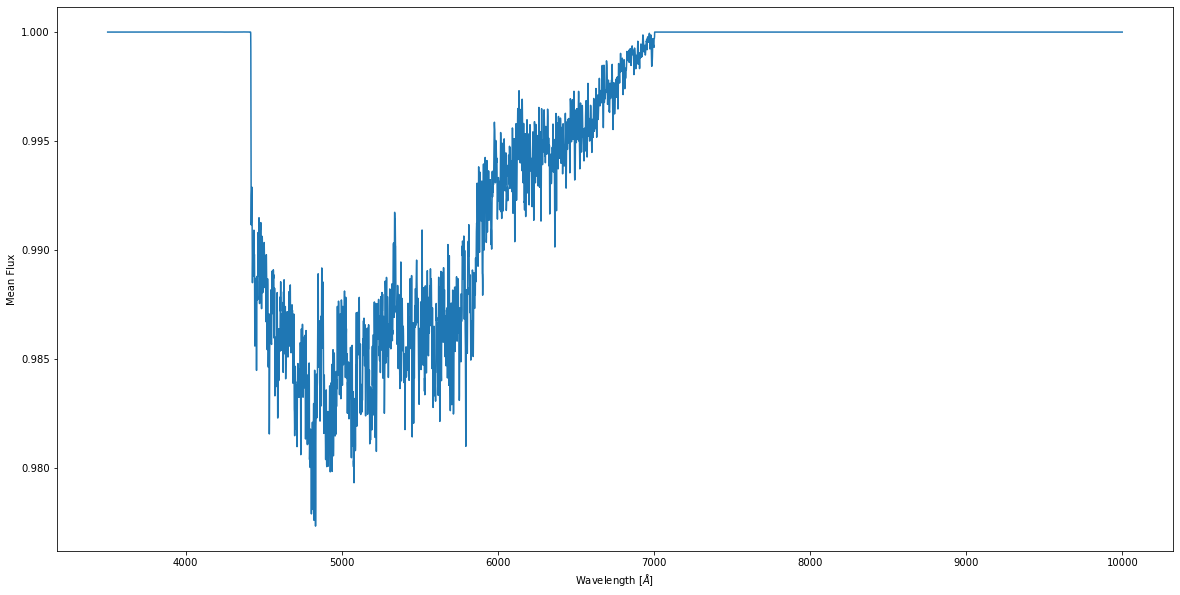

In [29]:
plt.figure(figsize=(20,10))
plt.plot(specobj_100.wave["brz"],mean_flux_transmission_100)
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Mean Flux")
plt.savefig("meanflux.png")

Text(0.5, 0, 'Wavelength [$\\AA$]')

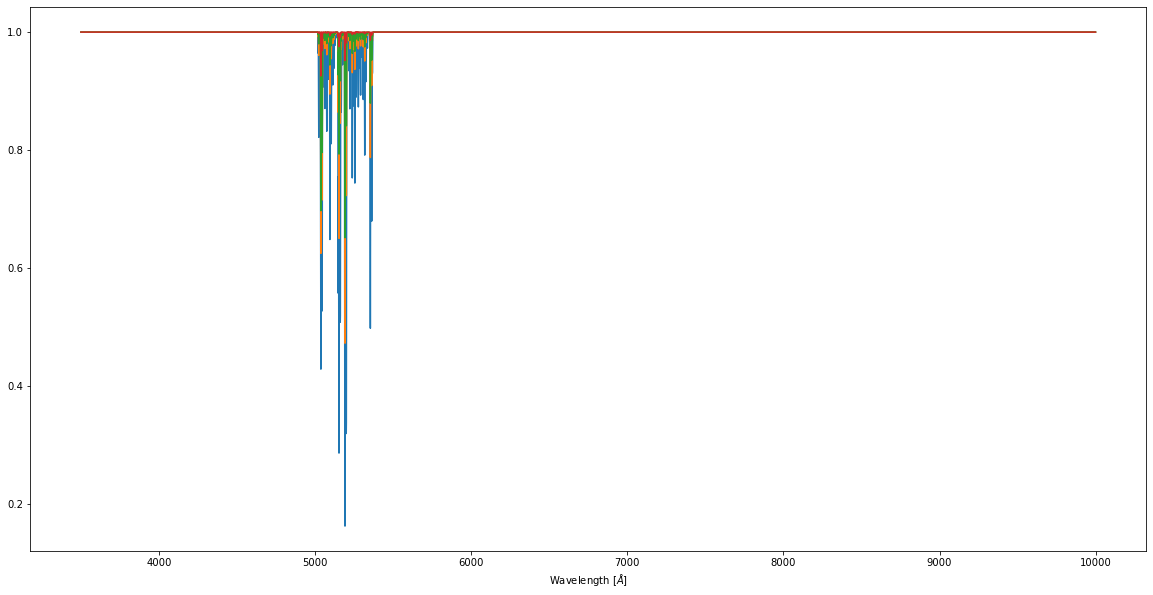

In [30]:
plt.figure(figsize=(20,10))
plt.plot(specobj_100.wave["brz"],trans_100[30])
plt.plot(specobj_20.wave["brz"],trans_20[30])
plt.plot(specobj_10.wave["brz"],trans_10[30])
plt.plot(specobj_1.wave["brz"],trans_1[30])
plt.xlabel("Wavelength [$\AA$]")

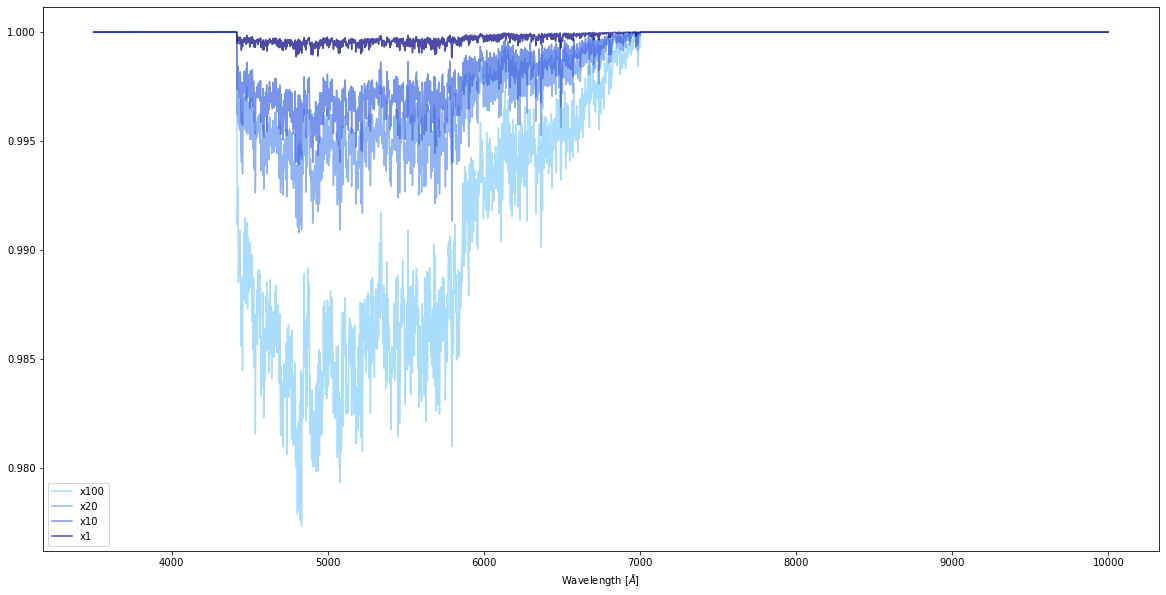

In [31]:
plt.figure(figsize=(20,10))
plt.plot(specobj_100.wave["brz"],mean_flux_transmission_100, alpha=0.7, color="lightskyblue", label="x100")
plt.plot(specobj_20.wave["brz"],mean_flux_transmission_20, alpha=0.7, color= "cornflowerblue", label="x20")
plt.plot(specobj_10.wave["brz"],mean_flux_transmission_10, alpha=0.7, color="royalblue", label="x10")
plt.plot(specobj_1.wave["brz"],mean_flux_transmission_1, alpha=0.7, color="navy", label="x1")
plt.legend()
plt.xlabel("Wavelength [$\AA$]")
plt.savefig("meanflux_allCIV.png")

# Computation of Deltas

$\delta = \frac{f}{C\bar{F}}-1$

weights, lambda, deltas

In [32]:
delta_100 = ((specobj_100.flux['brz']) / (continuum_100 * (mean_flux_transmission_100))) - 1.0
delta_20  = ((specobj_20.flux['brz'])  / (continuum_20  * (mean_flux_transmission_20)))  - 1.0
delta_10  = ((specobj_10.flux['brz'])  / (continuum_10  * (mean_flux_transmission_10)))  - 1.0
delta_1   = ((specobj_1.flux['brz'])   / (continuum_1   * (mean_flux_transmission_1)))   - 1.0

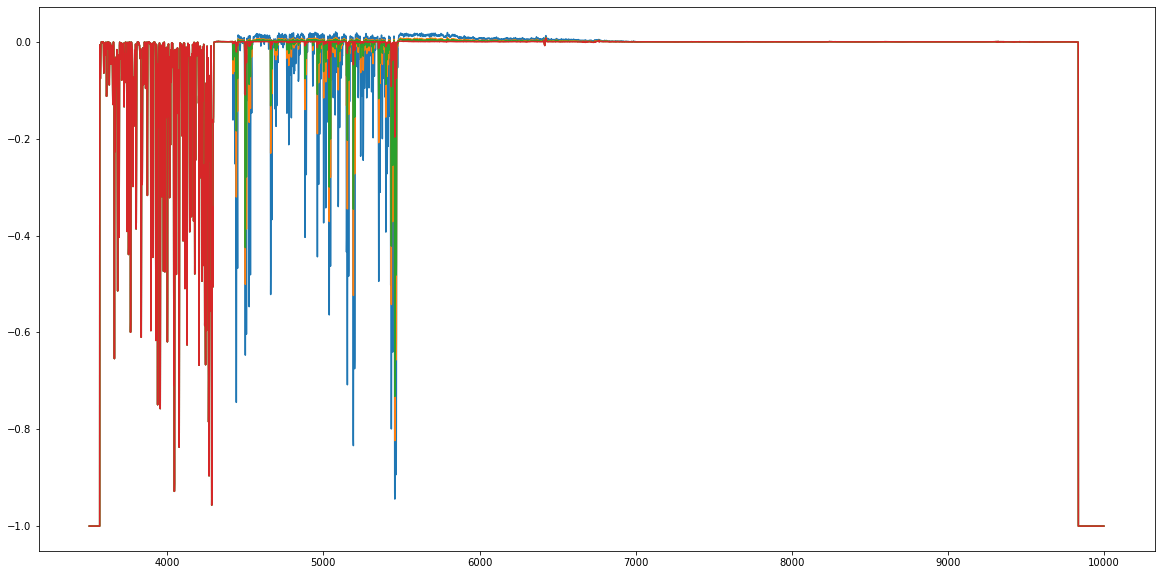

In [33]:
plt.figure(figsize=(20,10))
plt.plot(specobj_100.wave["brz"],delta_100[30])
plt.plot(specobj_20.wave["brz"],delta_20[30])
plt.plot(specobj_10.wave["brz"],delta_10[30])
plt.plot(specobj_1.wave["brz"],delta_1[30])
#plt.ylim(-0.005,0.005)